In [ ]:
import pandas as pd
import numpy as np
import chardet
import seaborn as sns

with open("/content/drive/MyDrive/Movies.csv", "rb") as f:
    encoding = chardet.detect(f.read())["encoding"]
df=pd.read_csv("/content/drive/MyDrive/Movies.csv",encoding=encoding)
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [ ]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
# Calculate the mean of the float column
float_mean = df["Rating"].mean()

df["Rating"].fillna(value=float_mean, inplace=True)

df["Year"].fillna(value="Null", inplace=True)
df["Duration"].fillna(value="Null", inplace=True)
df["Genre"].fillna(value="Null", inplace=True)
df["Votes"].fillna(value="Null", inplace=True)
df["Director"].fillna(value="Null", inplace=True)
df["Actor 1"].fillna(value="Null", inplace=True)
df["Actor 2"].fillna(value="Null", inplace=True)
df["Actor 3"].fillna(value="Null", inplace=True)


In [ ]:
df.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [ ]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,Null,Null,Drama,5.841621,Null,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.000000,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",5.841621,Null,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.400000,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,5.841621,Null,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
df.select_dtypes(include='int64').fillna(0, inplace=True)
df.select_dtypes(include='float64').fillna(0.0, inplace=True)
df.select_dtypes(include='object').fillna("NULL", inplace=True)

In [ ]:
df.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [ ]:
director_ratings = df.groupby('Director')['Rating'].mean().sort_values(ascending=False)
director_ratings

Director
Saif Ali Sayeed     10.0
Sriram Raja          9.7
Bobby Kumar          9.6
Arvind Pratap        9.4
Suhrud Godbole       9.4
                    ... 
Puja Bedi            2.3
Sumeer Sabharwal     1.9
Umesh Ghadge         1.9
Stanley D'Costa      1.8
Pramod Mandloi       1.7
Name: Rating, Length: 5939, dtype: float64

In [ ]:
print("Directors with High Ratings:")
print(director_ratings.head(10))

Directors with High Ratings:
Director
Saif Ali Sayeed    10.0
Sriram Raja         9.7
Bobby Kumar         9.6
Arvind Pratap       9.4
Suhrud Godbole      9.4
Munni Pankaj        9.4
Rahul Mallick       9.3
Venkatesh Bk        9.3
Gautam Joshi        9.3
Rajat Bhardwaj      9.3
Name: Rating, dtype: float64


In [ ]:
act1_ratings = df.groupby('Actor 1')['Rating'].mean().sort_values(ascending=False)
act2_ratings = df.groupby('Actor 2')['Rating'].mean().sort_values(ascending=False)
act3_ratings = df.groupby('Actor 3')['Rating'].mean().sort_values(ascending=False)
print("Actor 1 with High Ratings:")
print(act1_ratings)
print("Actor 2 with High Ratings:")
print(act2_ratings)
print("Actor 3 with High Ratings:")
print(act3_ratings)

Actor 1 with High Ratings:
Actor 1
Ahaan Jha            10.0
Raj Banerjee          9.7
Dharmendra Ahir       9.4
Vaibhav Khisti        9.4
Nishi Neha Mishra     9.4
                     ... 
Lucky Kohli           1.9
Thilakan              1.9
Meghna Desai          1.7
Richard Harris        1.6
Kamal Rashid Khan     1.4
Name: Rating, Length: 4719, dtype: float64
Actor 2 with High Ratings:
Actor 2
Mahesh Narayan      10.0
Emon Chatterjee      9.7
Ashfaq               9.6
Awanish Kotnal       9.4
Pankaj Kamal         9.4
                    ... 
Veena Malik          1.9
Isabelle Kaif        1.8
Meghna Kothari       1.7
Siddharth Dhawan     1.7
Jasmine Kaur         1.6
Name: Rating, Length: 4892, dtype: float64
Actor 3 with High Ratings:
Actor 3
Rajasree Rajakumari    10.0
Purshottam Mulani       9.7
Fasih Choudhry          9.6
Akash Kumar             9.4
Rakhi Mansha            9.4
                       ... 
Monal Gajjar            1.9
Sana Oberoi             1.9
Waluscha De Sousa       

In [ ]:
director_ratings = df.groupby('Director')['Rating'].mean().sort_values(ascending=False)

top_directors = director_ratings.head(10).index.tolist()
top_director_movies = df[df['Director'].isin(top_directors)]
director_movies_df = top_director_movies[['Name', 'Director', 'Rating']]
print(director_movies_df)

                      Name         Director  Rating
1314          Ashok Vatika    Rahul Mallick     9.3
2563                 Breed      Bobby Kumar     9.6
5077          Gho Gho Rani     Munni Pankaj     9.4
5125           God of gods     Venkatesh Bk     9.3
5410            Half Songs      Sriram Raja     9.7
6852                  June   Suhrud Godbole     9.4
8339       Love Qubool Hai  Saif Ali Sayeed    10.0
8344          Love Sorries     Gautam Joshi     9.3
9105                 Meher   Rajat Bhardwaj     9.3
14222  The Reluctant Crime    Arvind Pratap     9.4


In [ ]:
actor_ratings = df.groupby('Actor 1')['Rating'].mean().sort_values(ascending=False)

top_actors = actor_ratings.head(20).index.tolist()
top_actor_movies = df[df['Actor 1'].isin(top_actors) |
                               df['Actor 2'].isin(top_actors) |
                               df['Actor 3'].isin(top_actors)]
top_director_and_actor_movies = top_actor_movies[top_actor_movies['Director'].isin(top_directors)]

director_and_actor_movies_df = top_director_and_actor_movies[['Name', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Rating']]
print(director_and_actor_movies_df)

                      Name         Director            Actor 1  \
1314          Ashok Vatika    Rahul Mallick         Kunj Anand   
5077          Gho Gho Rani     Munni Pankaj  Nishi Neha Mishra   
5125           God of gods     Venkatesh Bk  Tejaswini Manogna   
5410            Half Songs      Sriram Raja       Raj Banerjee   
6852                  June   Suhrud Godbole     Vaibhav Khisti   
8339       Love Qubool Hai  Saif Ali Sayeed          Ahaan Jha   
8344          Love Sorries     Gautam Joshi   Prashant Chaubey   
9105                 Meher   Rajat Bhardwaj              Amrit   
14222  The Reluctant Crime    Arvind Pratap    Dharmendra Ahir   

               Actor 2              Actor 3  Rating  
1314    Sanjay Bishnoi         Paras Zutshi     9.3  
5077      Pankaj Kamal          Akash Kumar     9.4  
5125     Triyug Mantri      Raj Singh Verma     9.3  
5410   Emon Chatterjee    Purshottam Mulani     9.7  
6852    Nilesh Divekar       Jitendra Joshi     9.4  
8339    Mahesh 

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd


X = df[['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre','Votes']]
y = df['Rating']

categorical_features = ['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre','Votes']
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.8594941503285376


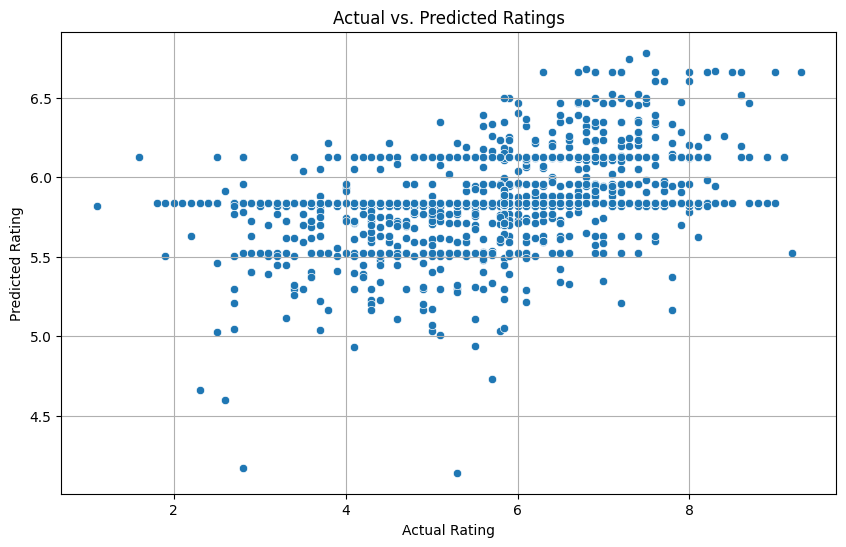

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs. Predicted Ratings')
plt.grid(True)
plt.show()

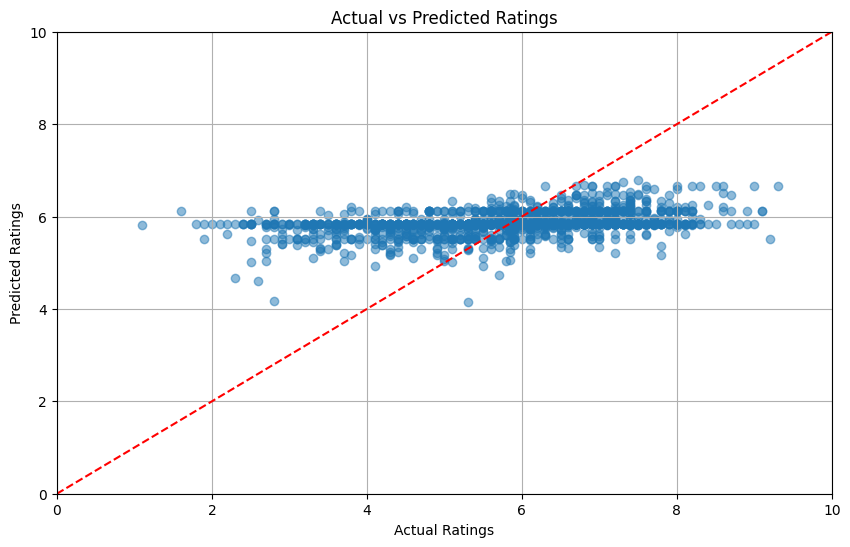

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(np.arange(0, 11), np.arange(0, 11), color='red', linestyle='--')
plt.title('Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.grid(True)
plt.show()

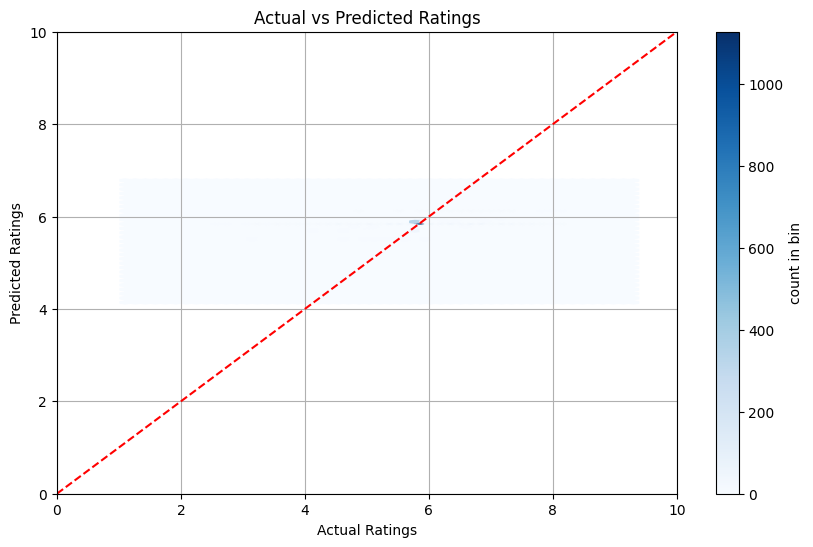

In [ ]:
plt.figure(figsize=(10, 6))
plt.hexbin(y_test, y_pred, gridsize=50, cmap='Blues')
plt.colorbar(label='count in bin')
plt.plot(np.arange(0, 11), np.arange(0, 11), color='red', linestyle='--')
plt.title('Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.grid(True)
plt.show()